In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS


In [7]:
google_JWCnews=pd.read_csv("newsData/google_JWCallnews.csv")
google_NickJWC=pd.read_csv("newsData/google_NickJWC.csv")

In [12]:
google_JWCnews
google_NickJWC['Keyword']="Nick Judin Jackson water crisis"
google_NickJWC

,Unnamed: 0,Date,Media,Title,Article,Summary,Keyword
0,0,3-Mar-21,Jackson Free Press,"PUBLISHER'S NOTE: Jackson’s Water Crisis, What...",While Lt. Gov. Delbert Hosemann often presents...,Around a long rectangle of tables in the middl...,Nick Judin Jackson water crisis
1,1,23-Mar-21,Slate,The Next Major Water Crisis Is Right Around th...,Subscribe to What Next on Apple Podcasts for t...,"For the past month, thousands of residents of ...",Nick Judin Jackson water crisis
2,2,23-Mar-21,Slate Magazine,One Month Without Water,"If you can't access your feeds, please contact...","If you can't access your feeds, please contact...",Nick Judin Jackson water crisis
3,3,6-Mar-21,NBC News,"Jackson, Mississippi has a water crisis becaus...",Mississippi Gov. Tate Reeves told the media th...,The Monday before Reeves’ flippant remark abou...,Nick Judin Jackson water crisis
4,4,26-Mar-21,WBUR,"The Jackson, Mississippi Water Crisis And Amer...","""And the city itself, because, like so many ci...",We talk America's crumbling water system.\nSo ...,Nick Judin Jackson water crisis
5,8,2021-03-02 01:54:57+00:00,NaN,Hosemann Pins Water Blame on Jackson Leaders S...,Lt. Gov. Delbert Hosemann confirmed today that...,Delbert Hosemann confirmed today that there ar...,Nick Judin Jackson water crisis
6,9,2021-03-27 02:34:08+00:00,NaN,"Under The Surface, Part 2: After Jackson Freez...","It was Wednesday, Feb. 17, 2021, when it all w...",Fewell is itself evidence of a water distribut...,Nick Judin Jackson water crisis


In [10]:
JWCnewsURL=pd.read_csv("newsData/JWCurlNews1.csv")
JWCnewsURL

,Unnamed: 0,Date,Title,Article,Summary
0,0,2021-04-20 17:51:29+00:00,"Water crisis continues in Mississippi, weeks a...",Mississippi Army National Guard Sgt. Chase Tou...,More than two weeks have passed since the cold...
1,1,NaN,"Jackson Water Woes, Giant Telescope Mirror, Sh...","What Went Wrong With Jackson, Mississippi�s Wa...",Share this on Facebook (Opens in a new window)
2,2,NaN,"Jackson, Mississippi has an ongoing water cris...","What Went Wrong With Jackson, Mississippi�s Wa...",NaN
3,3,3/3/2021 0:00,Like 'Peanut Brittle': Mississippi Water Crisi...,Like 'Peanut Brittle': Mississippi Water Crisi...,Like 'Peanut Brittle': Mississippi Water Crisi...
4,4,3/9/2021 0:00,Mississippi's capital city enters week 4 of a ...,Mississippi's capital city enters week 4 of a ...,Here's what to know about the water crisis in ...
5,5,3/3/2021 0:00,"Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re..."
6,6,3/24/2021 0:00,‘A profound betrayal of trust’: Why Jackson’s ...,"Janna Avalon, a 72-year-old retired newspaper ...",Every city water bill notifies customers of th...
7,7,2021-03-03 02:46:00+00:00,"Jackson, Mississippi, water crisis brings to l...",After more than two weeks without clean runnin...,Residents have been lining up at several sites...
8,8,2021-03-13 09:30:00+00:00,"A month without water: In Jackson, Mississippi...","JACKSON, Miss. — The power was out, the temper...",And although Jackson announced Friday that mos...
9,9,4/30/2021 0:00,Jackson residents faced down another water sho...,Jackson residents faced down another water sho...,Jackson residents faced down another water sho...


In [34]:
frames=[google_JWCnews,JWCnewsURL,google_NickJWC]
news=pd.concat(frames)
news=news.drop_duplicates(subset="Title")
news_data=news[['Date', 'Media', 'Title', 'Article','Summary', 'Keyword']].copy()
news_data

,Date,Media,Title,Article,Summary,Keyword
0,2-Mar-21,NBC News,"Jackson, Mississippi, water crisis brings to l...",After more than two weeks without clean runnin...,Residents have been lining up at several sites...,Jackson Mississippi water crisis
1,2-Mar-21,CNN,"In Jackson, Mississippi, some residents have b...","(CNN) Many residents of Jackson, Mississippi, ...","(CNN) Many residents of Jackson, Mississippi, ...",Jackson Mississippi water crisis
2,3-Mar-21,USA Today,"Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...",Jackson Mississippi water crisis
3,15-Mar-21,Slate,Ignore Mississippi’s Water Crisis at Your Own ...,"For four weeks now, thousands of residents of ...","Water mains were damaged, reservoirs froze, an...",Jackson Mississippi water crisis
4,"th · Mar 22, 2021",The New York Times,‘You Can’t Bathe. You Can’t Wash.’ Water Crisi...,Mr. Reeves called in the National Guard last m...,Mr. Reeves called in the National Guard last m...,Jackson Mississippi water crisis
...,...,...,...,...,...,...
43,2021-03-04 06:25:16+00:00,NaN,"Jackson, MS is Struggling With a Water Crisis,...","by Amy Lupica, ODP Staff Writer\n\nWhile all e...","by Amy Lupica, ODP Staff WriterWhile all eyes ...",NaN
44,2021-02-19 22:33:00+03:00,NaN,US cities slammed by storms face new crisis: W...,States slammed by winter storms that left mill...,States slammed by winter storms that left mill...,NaN
0,3-Mar-21,Jackson Free Press,"PUBLISHER'S NOTE: Jackson’s Water Crisis, What...",While Lt. Gov. Delbert Hosemann often presents...,Around a long rectangle of tables in the middl...,Nick Judin Jackson water crisis
5,2021-03-02 01:54:57+00:00,NaN,Hosemann Pins Water Blame on Jackson Leaders S...,Lt. Gov. Delbert Hosemann confirmed today that...,Delbert Hosemann confirmed today that there ar...,Nick Judin Jackson water crisis


In [17]:
#news_data.to_csv("newsData/JWCallNewsData.csv")

In [3]:
news_data=pd.read_csv("newsData/JWCallNewsData.csv")

In [4]:
news_data

,Unnamed: 0,Date,Media,Title,Article,Summary,Keyword
0,0,2-Mar-21,NBC News,"Jackson, Mississippi, water crisis brings to l...",After more than two weeks without clean runnin...,Residents have been lining up at several sites...,Jackson Mississippi water crisis
1,1,2-Mar-21,CNN,"In Jackson, Mississippi, some residents have b...","(CNN) Many residents of Jackson, Mississippi, ...","(CNN) Many residents of Jackson, Mississippi, ...",Jackson Mississippi water crisis
2,2,3-Mar-21,USA Today,"Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...",Jackson Mississippi water crisis
3,3,15-Mar-21,Slate,Ignore Mississippi’s Water Crisis at Your Own ...,"For four weeks now, thousands of residents of ...","Water mains were damaged, reservoirs froze, an...",Jackson Mississippi water crisis
4,4,"th · Mar 22, 2021",The New York Times,‘You Can’t Bathe. You Can’t Wash.’ Water Crisi...,Mr. Reeves called in the National Guard last m...,Mr. Reeves called in the National Guard last m...,Jackson Mississippi water crisis
...,...,...,...,...,...,...,...
219,43,2021-03-04 06:25:16+00:00,Our Daily Planet,"Jackson, MS is Struggling With a Water Crisis,...","by Amy Lupica, ODP Staff Writer\n\nWhile all e...","by Amy Lupica, ODP Staff WriterWhile all eyes ...",NaN
220,44,2021-02-19 22:33:00+03:00,Daily Sabah,US cities slammed by storms face new crisis: W...,States slammed by winter storms that left mill...,States slammed by winter storms that left mill...,NaN
221,0,3-Mar-21,Jackson Free Press,"PUBLISHER'S NOTE: Jackson’s Water Crisis, What...",While Lt. Gov. Delbert Hosemann often presents...,Around a long rectangle of tables in the middl...,Nick Judin Jackson water crisis
222,5,2021-03-02 01:54:57+00:00,Mississippi Free Press,Hosemann Pins Water Blame on Jackson Leaders S...,Lt. Gov. Delbert Hosemann confirmed today that...,Delbert Hosemann confirmed today that there ar...,Nick Judin Jackson water crisis


['WLBT', 'The Clarion-Ledger', 'WJTV', 'WAPT', 'Jackson Free Press', 'Mississippi Today', 'ABC News', 'CNN', 'WBUR', 'NPR']


Text(0.5, 1.0, 'Top 10 News Media sources by Article counts')

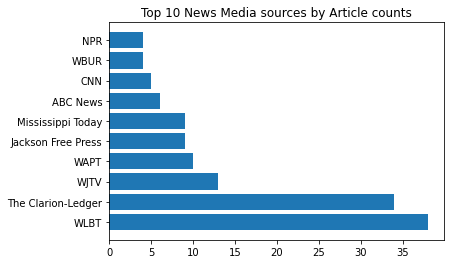

In [7]:
#Barchart of top news media sources
news_data_mediacount=news_data.groupby('Media').count()

news_data_mediacountplot=news_data_mediacount.reset_index()
news_data_mediacountplot=news_data_mediacountplot.sort_values(by=['Title'], ascending=False)
news_data_mediacountplot_top10=news_data_mediacountplot.head(10)
print(news_data_mediacountplot_top10['Media'].to_list())
#top 10 news media sources
plt.barh(news_data_mediacountplot_top10['Media'],news_data_mediacountplot_top10['Title'])
plt.title("Top 10 News Media sources by Article counts")


In [60]:
#User-defined function to convert into datetime type


from dateutil.parser import parse
def convertDate(str):
    try:
        datetime=parse(str)
        print(type(datetime))
        return datetime
    except:
        return None

news_data_plot=news_data[['Date','Title','Media','Article']].copy()
#news_data=news_data.dropna()

#news_data['Date']=pd.to_datetime(news_data['Date'])
#news_data['Datetime']=news_data['Date'].apply(convertDate)
# news_data=news_data.set_index(['Datetime'])
#news_data['Date']=news_data.index.date
news_data_plot=news_data_plot.dropna()
news_data_plot['DateTime']=news_data_plot['Date'].apply(convertDate)
news_data_plot=news_data_plot.dropna()
#news_data_plot=news_data_plot.set_index('DateTime')
#news_data_plot['Date']=news_data_plot.index.date

news_data_plot

#news_data_plot4=news_data_plot.copy()

<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.dat

,Date,Title,Media,Article,DateTime
0,2-Mar-21,"Jackson, Mississippi, water crisis brings to l...",NBC News,After more than two weeks without clean runnin...,2021-03-02 00:00:00
1,2-Mar-21,"In Jackson, Mississippi, some residents have b...",CNN,"(CNN) Many residents of Jackson, Mississippi, ...",2021-03-02 00:00:00
2,3-Mar-21,"Weeks after Mississippi winter storms, some re...",USA Today,"Weeks after Mississippi winter storms, some re...",2021-03-03 00:00:00
3,15-Mar-21,Ignore Mississippi’s Water Crisis at Your Own ...,Slate,"For four weeks now, thousands of residents of ...",2021-03-15 00:00:00
5,12-Mar-21,"Jackson, Mississippi, Residents Enter 4th Week...",NPR,"Jackson, Mississippi, Residents Enter 4th Week...",2021-03-12 00:00:00
...,...,...,...,...,...
219,2021-03-04 06:25:16+00:00,"Jackson, MS is Struggling With a Water Crisis,...",Our Daily Planet,"by Amy Lupica, ODP Staff Writer\n\nWhile all e...",2021-03-04 06:25:16+00:00
220,2021-02-19 22:33:00+03:00,US cities slammed by storms face new crisis: W...,Daily Sabah,States slammed by winter storms that left mill...,2021-02-19 22:33:00+03:00
221,3-Mar-21,"PUBLISHER'S NOTE: Jackson’s Water Crisis, What...",Jackson Free Press,While Lt. Gov. Delbert Hosemann often presents...,2021-03-03 00:00:00
222,2021-03-02 01:54:57+00:00,Hosemann Pins Water Blame on Jackson Leaders S...,Mississippi Free Press,Lt. Gov. Delbert Hosemann confirmed today that...,2021-03-02 01:54:57+00:00


In [5]:
def convertyearMonth(datetime):
    try:
        yearmonth=datetime.strftime('%Y-%m-%d')
        return yearmonth
    except:
        return
news_data_plot['Date'] = news_data_plot['DateTime'].apply(convertyearMonth)
news_data_plot=news_data_plot[news_data_plot['Date']!='2018-01-19']
news_data_plot=news_data_plot.groupby('Date').count()
news_data_plot

,Title,Media,Article,DateTime
Date,,,,
2021-02-13,2,2,2,2
2021-02-14,1,1,1,1
2021-02-16,2,2,2,2
2021-02-17,4,4,4,4
2021-02-18,11,11,11,11
2021-02-19,15,15,15,15
2021-02-20,3,3,3,3
2021-02-21,3,3,3,3
2021-02-22,4,4,4,4


Text(0, 0.5, 'Number of articles')

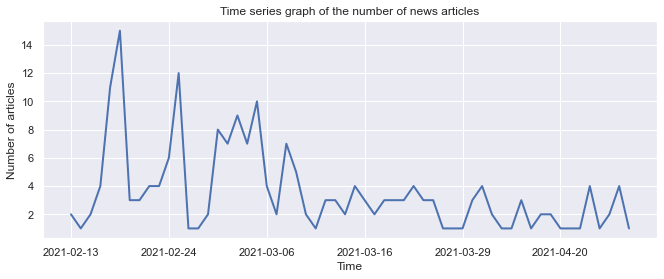

In [6]:

sns.set(rc={'figure.figsize':(11, 4)})
news_data_plot['Title'].plot(linewidth=2)
plt.title("Time series graph of the number of news articles")
plt.xlabel("Time")
plt.ylabel("Number of articles")

In [7]:
#Sentiment Analysis of News Articles
from nltk import tokenize
analyser = SentimentIntensityAnalyzer()
def calculateScoreArticle(paragraph):

    try:
     
        sentence_list = tokenize.sent_tokenize(paragraph)
      
        paragraphSentiments = 0.0
        for sentence in sentence_list:
            
            vs = analyser.polarity_scores(sentence)
           
            paragraphSentiments += vs["compound"]
     
        return round(paragraphSentiments / len(sentence_list), 4)
        print("AVERAGE SENTIMENT FOR PARAGRAPH: \t" + str(round(paragraphSentiments / len(sentence_list), 4)))
        #print("----------------------------------------------------")
    except:
        return 0


news_data['compound'] = [calculateScoreArticle(text) for text in news_data['Article']]


In [8]:
#news_data['compound'].values()
news_data

,Unnamed: 0,Date,Media,Title,Article,Summary,Keyword,compound
0,0,2-Mar-21,NBC News,"Jackson, Mississippi, water crisis brings to l...",After more than two weeks without clean runnin...,Residents have been lining up at several sites...,Jackson Mississippi water crisis,-0.1189
1,1,2-Mar-21,CNN,"In Jackson, Mississippi, some residents have b...","(CNN) Many residents of Jackson, Mississippi, ...","(CNN) Many residents of Jackson, Mississippi, ...",Jackson Mississippi water crisis,-0.0756
2,2,3-Mar-21,USA Today,"Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...",Jackson Mississippi water crisis,-0.2175
3,3,15-Mar-21,Slate,Ignore Mississippi’s Water Crisis at Your Own ...,"For four weeks now, thousands of residents of ...","Water mains were damaged, reservoirs froze, an...",Jackson Mississippi water crisis,-0.1861
4,4,"th · Mar 22, 2021",The New York Times,‘You Can’t Bathe. You Can’t Wash.’ Water Crisi...,Mr. Reeves called in the National Guard last m...,Mr. Reeves called in the National Guard last m...,Jackson Mississippi water crisis,0.2531
...,...,...,...,...,...,...,...,...
219,43,2021-03-04 06:25:16+00:00,Our Daily Planet,"Jackson, MS is Struggling With a Water Crisis,...","by Amy Lupica, ODP Staff Writer\n\nWhile all e...","by Amy Lupica, ODP Staff WriterWhile all eyes ...",NaN,-0.3991
220,44,2021-02-19 22:33:00+03:00,Daily Sabah,US cities slammed by storms face new crisis: W...,States slammed by winter storms that left mill...,States slammed by winter storms that left mill...,NaN,-0.1793
221,0,3-Mar-21,Jackson Free Press,"PUBLISHER'S NOTE: Jackson’s Water Crisis, What...",While Lt. Gov. Delbert Hosemann often presents...,Around a long rectangle of tables in the middl...,Nick Judin Jackson water crisis,0.0222
222,5,2021-03-02 01:54:57+00:00,Mississippi Free Press,Hosemann Pins Water Blame on Jackson Leaders S...,Lt. Gov. Delbert Hosemann confirmed today that...,Delbert Hosemann confirmed today that there ar...,Nick Judin Jackson water crisis,-0.0023


In [9]:
#Average compound sentiment score of news articles
news_data['compound'].mean()

-0.04261071428571428

In [10]:
#grabbing year-month from the dates
news_data['DateTime']=news_data['Date'].apply(convertDate)

def convertyearMonth(datetime):
    try:
        yearmonth=datetime.strftime('%Y-%m')
        return yearmonth
    except:
        return
news_data['Year-Month'] = news_data['DateTime'].apply(convertyearMonth)

news_data

<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.dat

,Unnamed: 0,Date,Media,Title,Article,Summary,Keyword,compound,DateTime,Year-Month
0,0,2-Mar-21,NBC News,"Jackson, Mississippi, water crisis brings to l...",After more than two weeks without clean runnin...,Residents have been lining up at several sites...,Jackson Mississippi water crisis,-0.1189,2021-03-02 00:00:00,2021-03
1,1,2-Mar-21,CNN,"In Jackson, Mississippi, some residents have b...","(CNN) Many residents of Jackson, Mississippi, ...","(CNN) Many residents of Jackson, Mississippi, ...",Jackson Mississippi water crisis,-0.0756,2021-03-02 00:00:00,2021-03
2,2,3-Mar-21,USA Today,"Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...","Weeks after Mississippi winter storms, some re...",Jackson Mississippi water crisis,-0.2175,2021-03-03 00:00:00,2021-03
3,3,15-Mar-21,Slate,Ignore Mississippi’s Water Crisis at Your Own ...,"For four weeks now, thousands of residents of ...","Water mains were damaged, reservoirs froze, an...",Jackson Mississippi water crisis,-0.1861,2021-03-15 00:00:00,2021-03
4,4,"th · Mar 22, 2021",The New York Times,‘You Can’t Bathe. You Can’t Wash.’ Water Crisi...,Mr. Reeves called in the National Guard last m...,Mr. Reeves called in the National Guard last m...,Jackson Mississippi water crisis,0.2531,None,None
...,...,...,...,...,...,...,...,...,...,...
219,43,2021-03-04 06:25:16+00:00,Our Daily Planet,"Jackson, MS is Struggling With a Water Crisis,...","by Amy Lupica, ODP Staff Writer\n\nWhile all e...","by Amy Lupica, ODP Staff WriterWhile all eyes ...",NaN,-0.3991,2021-03-04 06:25:16+00:00,2021-03
220,44,2021-02-19 22:33:00+03:00,Daily Sabah,US cities slammed by storms face new crisis: W...,States slammed by winter storms that left mill...,States slammed by winter storms that left mill...,NaN,-0.1793,2021-02-19 22:33:00+03:00,2021-02
221,0,3-Mar-21,Jackson Free Press,"PUBLISHER'S NOTE: Jackson’s Water Crisis, What...",While Lt. Gov. Delbert Hosemann often presents...,Around a long rectangle of tables in the middl...,Nick Judin Jackson water crisis,0.0222,2021-03-03 00:00:00,2021-03
222,5,2021-03-02 01:54:57+00:00,Mississippi Free Press,Hosemann Pins Water Blame on Jackson Leaders S...,Lt. Gov. Delbert Hosemann confirmed today that...,Delbert Hosemann confirmed today that there ar...,Nick Judin Jackson water crisis,-0.0023,2021-03-02 01:54:57+00:00,2021-03


In [11]:
#Plotting sentiment scores by months
news_data_plot2=news_data.groupby("Year-Month").mean()
news_data_plot2=news_data_plot2.reset_index()
news_data_plot2=news_data_plot2[news_data_plot2['Year-Month']!='2018-01']

In [12]:
news_data_plot2

,Year-Month,Unnamed: 0,compound
0,2021-02,120.492958,-0.052328
1,2021-03,74.601852,-0.035396
2,2021-04,77.052632,-0.059379
3,2021-05,81.375000,-0.111288


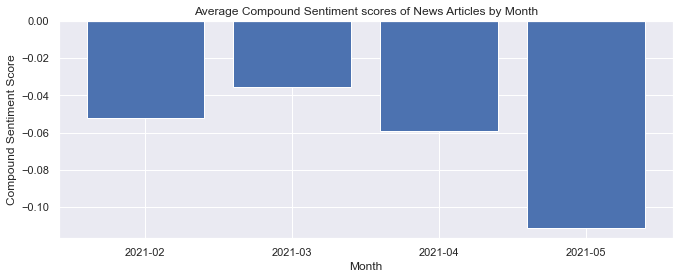

In [13]:

x_month=[2,3,4,5]
plt.bar(news_data_plot2['Year-Month'],news_data_plot2['compound'])
#plt.xticks(x_month)
plt.title("Average Compound Sentiment scores of News Articles by Month")
plt.xlabel("Month")
plt.ylabel("Compound Sentiment Score")
plt.show()

There are 978596 words in the combination of all articles


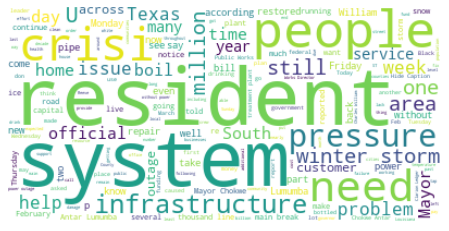

In [14]:
#Word clouds from news articles

text = " ".join(review for review in news_data['Article'])
print ("There are {} words in the combination of all articles".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["https",'t','co','amp','s','M','water','city','Jackson','Mississippi','state','said','will'])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
#Comparing average compound snetiment score of Mississippi based news media and rest of the news media
news_data['Media'].to_list()
media_list=['Slate','USA Today','CNN','ABC News','Jackson Free Press','Mississippi Today','WAPT','WJTV','The Clarion-Ledger','WLBT']
news_data.Media.isin(media_list)
news_data_plot3=news_data[news_data.Media.isin(media_list)]
news_data_plot3
news_data_plot3=news_data_plot3.groupby("Media").mean()
news_data_plot3=news_data_plot3.reset_index()
news_data_plot3

,Media,Unnamed: 0,compound
0,ABC News,81.833333,-0.066850
1,CNN,58.000000,-0.153940
2,Jackson Free Press,115.000000,-0.014122
3,Mississippi Today,75.777778,0.120200
4,Slate,28.333333,-0.079467
5,The Clarion-Ledger,102.647059,-0.056303
6,USA Today,39.666667,-0.182133
7,WAPT,85.300000,-0.015560
8,WJTV,116.307692,0.033315
9,WLBT,118.578947,-0.016642


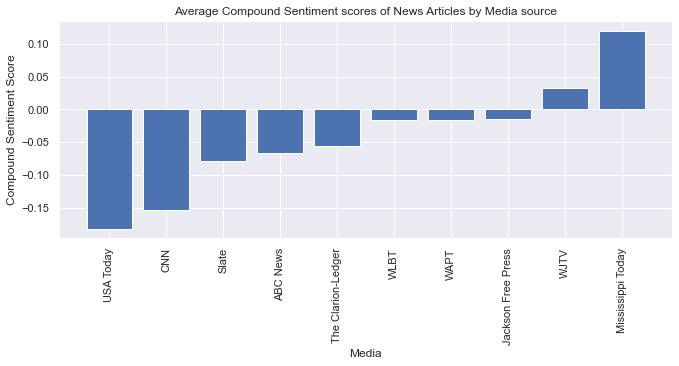

In [16]:
#plotting compound sentment score by media source

news_data_plot3.sort_values('compound',inplace=True)
plt.bar(news_data_plot3['Media'],news_data_plot3['compound'])

#plt.xticks(x_month)
plt.title("Average Compound Sentiment scores of News Articles by Media source")
plt.xlabel("Media")
plt.ylabel("Compound Sentiment Score")
plt.xticks(rotation = 90)
plt.show()

In [74]:
news_data_plot=news_data[['Date','Title','Media','Article']].copy()


news_data_plot=news_data_plot.dropna()
news_data_plot['DateTime']=news_data_plot['Date'].apply(convertDate)
news_data_plot=news_data_plot.dropna()

news_data_plot4=news_data_plot.copy()

def convertyearMonth(datetime):
    try:
        yearmonth=datetime.strftime('%Y-%m-%d')
        return yearmonth
    except:
        return
    
news_data_plot4['New_Date'] = news_data_plot4['DateTime'].apply(convertyearMonth)
news_data_plot4=news_data_plot4.groupby(['New_Date','Media']).count()
                                         
news_data_plot4


<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.datetime'>
<class 'datetime.dat

Date  Title  Article  DateTime
New_Date   Media                                                 
2021-02-13 The Clarion-Ledger         1      1        1         1
           The Vicksburg Post         1      1        1         1
2021-02-14 The Clarion-Ledger         1      1        1         1
2021-02-16 CNN                        1      1        1         1
           WLBT                       1      1        1         1
...                                 ...    ...      ...       ...
2021-05-03 The Clarion-Ledger         1      1        1         1
           Water Quality Products     1      1        1         1
2021-05-04 The Clarion-Ledger         2      2        2         2
           WBUR                       2      2        2         2
2021-05-25 WAPT                       1      1        1         1

[176 rows x 4 columns]

In [78]:
#news_data_plot4=news_data_plot4.reset_index()
# type(news_data_plot['DateTime'][0])
# news_data_plot=news_data_plot.groupby(['DateTime','Media']).count()
# news_data_plot

In [79]:
news_data_plot4=news_data_plot4.reset_index()

In [82]:
type(news_data_plot4['New_Date'].to_list()[0])

pandas._libs.tslibs.timestamps.Timestamp

In [81]:
#news_data_plot4=news_data_plot4.reset_index()
news_data_plot4['New_Date'] = pd.to_datetime(news_data_plot4['New_Date']) - pd.to_timedelta(7, unit='d')
news_data_plot4 = news_data_plot4.groupby(['Media', pd.Grouper(key='New_Date', freq='W-MON')])['Title'].sum().reset_index().sort_values('New_Date')

# X_axis=np.arrange(len())

# X = ['Group A','Group B','Group C','Group D']
# Ygirls = [10,20,20,40]
# Zboys = [20,30,25,30]
  
# X_axis = np.arange(len(X))
  
# plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Girls')
# plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Boys')
  
# plt.xticks(X_axis, X)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()

In [102]:


news_data_plot4['New_Date'].to_list()

news_data_plot4.groupby(['New_Date','Media']).sum()

news_data_plot4['New_Date'].to_list()
news_data_plot4

Title
New_Date   Media                        
2021-02-08 The Clarion-Ledger          2
           The Vicksburg Post          1
2021-02-15 ABC News                    3
           AP News                     1
           Action News 5               1
...                                  ...
2021-04-26 WLBT                        2
           Water Quality Products      1
2021-05-03 The Clarion-Ledger          2
           WBUR                        2
2021-05-24 WAPT                        1

[133 rows x 1 columns]

In [110]:
news_data_plot4['New_Date'].reset_index()

x_list=news_data_plot4['New_Date'].unique()
#news_data_plot4.to_csv("bargraph.csv")

In [95]:
# x = np.arange(x_list)
# ax1 = plt.subplot(1,1,1)
# w = 0.3
# #plt.xticks(), will label the bars on x axis with the respective country names.
# plt.xticks(x + w /2, news_data_plot4['New_Date'], rotation='vertical')
# pop =ax1.bar(x, news_data_plot4['Title'], width=w, color='b', align='center')
# #The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
# ax2 = ax1.twinx()
# #We have calculated GDP by dividing gdpPerCapita to population.
# gdp =ax2.bar(x + w, datasort['gdpPerCapita'] * datasort.population / 10**9, width=w,color='g',align='center')
# #Set the Y axis label as GDP.
# plt.ylabel('GDP')
# #To set the legend on the plot we have used plt.legend()
# plt.legend([pop, gdp],['Population in Millions', 'GDP in Billions'])
# #To show the plot finally we have used plt.show().
# plt.show()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132])

In [ ]:
#Topic classification


In [ ]:
#sentiment scores
#wordclouds
#find terms associated with labels
#what % of articles related to each topic categor